##### [2022-DataMining]
# Youden's J Statistic
#### 최민영

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score

In [2]:
result = pd.read_csv('C:/Users/wl498/Documents/datamine/spotify_knn_15_rbst_seed1.csv')
result['y_pred'] = result['y_prob'].apply(lambda x: x>0.5).astype('int16')

In [3]:
result

y_true    y_prob  y_pred
0          1  0.733333       1
1          1  0.800000       1
2          1  0.733333       1
3          1  0.800000       1
4          0  0.000000       0
...      ...       ...     ...
1915       0  0.733333       1
1916       0  0.800000       1
1917       1  0.666667       1
1918       0  0.866667       1
1919       1  0.466667       0

[1920 rows x 3 columns]

### find_optimal_cutoff

In [4]:
def find_optimal_cutoff (y_prob, y_true, pos_label = 1, verbose = 0, return_stat = False):
    result = pd.DataFrame ({'y_true': y_true, 'y_prob': y_prob}).sort_values (by = 'y_prob')
    y_label = np. unique (result.y_true)
    neg_label = np.delete(y_label, pos_label).item()
    J = []
    cutoffs = result.y_prob.unique ()
    for c in cutoffs:
        y_pred = np.where(result.y_prob >= c, pos_label, neg_label)
        sens = recall_score( result.y_true, y_pred, pos_label= pos_label)
        spec = recall_score(result.y_true, y_pred, pos_label= neg_label)
        J.append (sens + spec -1)
        if verbose > 0:      
             print(f"[cut-off {c:.3f}] J = {sens + spec -1:.3f}")
    opt_cutoff_ind = np.argmax (J)
    opt_cutoff = cutoffs[opt_cutoff_ind]
    print (f"optimal cut-off = {opt_cutoff}")
    if return_stat:
        return cutoffs, J, opt_cutoff 
    else:
        return opt_cutoff

In [5]:
cutoffs, J, opt_cutoff = find_optimal_cutoff(result.y_prob, result.y_true, 1, 0, return_stat=True)

optimal cut-off = 0.6


Text(0, 0.5, 'J')

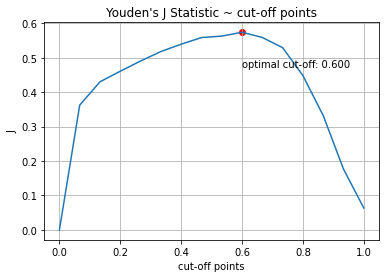

In [6]:
opt_cutoff_ind = np.argmax(J)
plt.plot(cutoffs, J)
plt.scatter(cutoffs[opt_cutoff_ind], J[opt_cutoff_ind], c = 'red')
plt.grid()
plt.title("Youden's J Statistic ~ cut-off points")
plt.annotate( f'optimal cut-off: {cutoffs[opt_cutoff_ind]:.3f}', (cutoffs[opt_cutoff_ind], J[opt_cutoff_ind] -0.1 ) )
plt.xlabel('cut-off points')
plt.ylabel('J')

## cut-off 설정에 따른 성능 비교
### - 0.5를 cut-off로 본 기준 클래스 예측

In [7]:
from sklearn.metrics import f1_score
print("Sensitivity: {r}, Specificity: {s} f1_score{f}".format(r = recall_score(result.y_true, result.y_pred, pos_label = 1),
                                                  s = recall_score(result.y_true, result.y_pred, pos_label = 0),
                                                  f = f1_score(result.y_true, result.y_pred, pos_label = 1)
                                                             ))

Sensitivity: 0.9355179704016914, Specificity: 0.6273100616016427 f1_score0.8067456700091158


### - Youden's J의 optimal cut off 이용한 클래스 예측

In [8]:
print(f"optimal cut-off = {opt_cutoff}")
y_pred_opt = np.where( result.y_prob > opt_cutoff, 1, 0 )
print("Sensitivity: {r}, Specificity: {s} f1_score{f}, acc:{a}".format(r = recall_score(result.y_true, y_pred_opt, pos_label = 1),
                                                  s = recall_score(result.y_true, y_pred_opt, pos_label = 0),
                                                  f = f1_score(result.y_true, y_pred_opt, pos_label = 1),
                                                  a = accuracy_score(result.y_true, y_pred_opt)
                                                  ))

optimal cut-off = 0.6
Sensitivity: 0.8308668076109936, Specificity: 0.7279260780287474 f1_score0.7871807711567351, acc:0.7786458333333334
